# 1. Problem Statement
To build a classification model from the data collected by a healthcare organization together with a couple of government hospitals about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This model will be helpful in early identification of disease , improving the health conditions and the economy.

### Importing the required libraries 

In [19]:
# for manipulating data
import pandas as pd
import numpy as np
from collections import Counter

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for the model
from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# for Q-Q plots
import scipy.stats as stats

# for missing data imputation and outlier removal
from feature_engine import missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

# 1. Data Exploration

In [20]:
# load dataset
data = pd.read_csv('data_files/Problem2_Data.csv')
# Printing the shape of the data and the top 5 rows
print(data.shape)
data.head()

(34281, 25)


,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0


### Types of variables

In [21]:
# let's inspect the type of variables in pandas
data.dtypes

ID          int64
IV          int64
A1          int64
A2        float64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
A11         int64
A12         int64
A13         int64
A14         int64
A15       float64
A16       float64
A17         int64
A18         int64
A19         int64
A20         int64
A21       float64
A22         int64
Target      int64
dtype: object

In [22]:
# let's inspect the variable values, printing first 20 unique values
for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

ID [1443894 1810849 2264999 1931676 2070885 1566137 3265646 2809957 1240251
 1784378 1533473 1619727 2286638 3126012 1705146 2175794 2121758 2268595
 1321868 2136569] 

IV [2049   48  318   62    2 6648   10   22  160    8   87  183   70   54
   14 4995   20    1   13    3] 

A1 [  44    0    2    4 2327    3   43   64   19    1    6   82   70    8
  501  188   12   95   63  244] 

A2 [ 8.  9.  2.  6. 12. 17. nan  4. 16.  5. 10.  3. 52. 14. 15. 20.  0. 13.
 11. 26.] 

A3 [  11    0 1404    1   13    2   94   53  168   30  336   99   65   14
   21  110   69   10    3   55] 

A4 [  0  18  97 354   1   2   5  20   9   4   3  12   7  43  17   8   6  80
  42 447] 

A5 [    0 11604     3  1250     6   240   174  1260    10    54     1  1578
   180   493     9    48    34     2    80   100] 

A6 [    0    15 23532    12   120  1250    48     1    10     2   480   398
  2268   127     3  2418   468     7   925    18] 

A7 [    0    30     1 35880    21     3   180    29  1250    48    15     2

In [23]:
# numerical: discrete vs continuous
# segregating the data between discrete and continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Target' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Target' and var not in discrete]

print('There are {} discrete variables : {}'.format(len(discrete), discrete))
print('There are {} continuous variables {}'.format(len(continuous), continuous))

There are 7 discrete variables : ['A11', 'A13', 'A17', 'A18', 'A19', 'A20', 'A22']
There are 17 continuous variables ['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A14', 'A15', 'A16', 'A21']


In [24]:
# understanding the imbalance of all cardinal values of the discrete variables
for col in discrete:
    print(col, Counter(data[col]))

A11 Counter({27: 34281})
A13 Counter({0: 34218, 1: 63})
A17 Counter({0: 27128, 1: 7153})
A18 Counter({0: 34270, 1: 11})
A19 Counter({0: 29758, 1: 4523})
A20 Counter({1: 32991, 0: 1290})
A22 Counter({0: 34274, 1: 7})


In [67]:
# Calculating the imbalance in the target variables
counterObject = Counter(data['Target'])
print(round(counterObject[1]/(counterObject[0]+counterObject[1]),3))

0.329


### Variable characteristics

In [42]:
# Identifying the proportion of missing data
data.isnull().mean()

ID        0.000000
IV        0.000000
A1        0.000000
A2        0.050844
A3        0.000000
A4        0.000000
A5        0.000000
A6        0.000000
A7        0.000000
A8        0.000000
A9        0.000000
A10       0.000000
A11       0.000000
A12       0.000000
A13       0.000000
A14       0.000000
A15       0.000000
A16       0.000000
A17       0.000000
A18       0.000000
A19       0.000000
A20       0.000000
A21       0.000000
A22       0.000000
Target    0.000000
dtype: float64

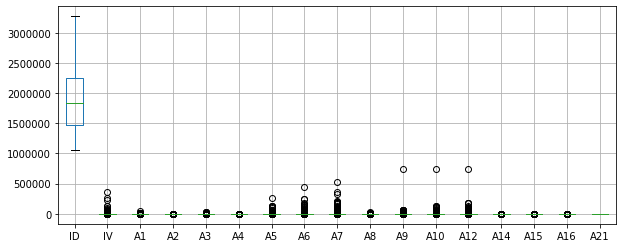

In [66]:
# outliers
data[continuous].boxplot(figsize=(10,4))

In [71]:
# feature magnitude
data.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,...,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,...,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,...,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


# Separating the data into train and test 
This step is done to make sure that imputation for missing data does not use the test data

In [72]:
# separate into training and testing set to make
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Target', axis=1),  # predictors
    data['Target'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((27424, 24), (6857, 24))

In [73]:
X_train_copy = X_train.copy(deep=True)

### Missing data imputation

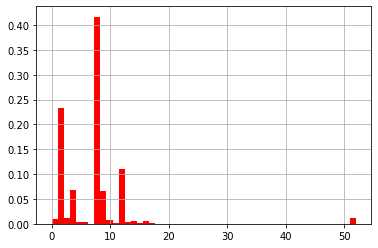

In [75]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
X_train['A2'].hist(bins=50, ax=ax, density=True, color='red')


In [77]:
# we call the imputer from feature-engine
# we specify the imputation strategy, median in this case
cols_to_use = ['A2']
imputer = mdi.MeanMedianImputer(imputation_method='median', variables=cols_to_use)

In [81]:
# we fit the imputer
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [82]:
# here we can see the mean assigned to each variable
imputer.imputer_dict_

{'A2': 8.0}

In [83]:
# feature-engine returns a dataframe
#X_train_t = imputer.transform(X_train)
#X_train_t.head()
X_train_copy['A2'].isnull().mean()

0.05061260210035006

In [84]:
X_train['A2'].isnull().mean()

0.0

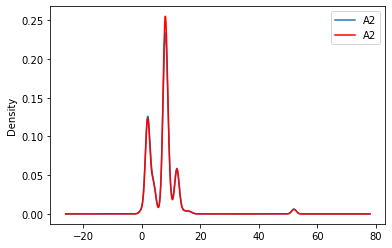

In [85]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train_copy['A2'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['A2'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the mean / median imputation doesn't distorts the original distribution of the variable A2. As variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [86]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# low in A2, ~5%

print('Original variable variance: ', X_train_copy['A2'].var())
print('Variance after median imputation: ', X_train['A2'].var())

Original variable variance:  37.118103324639165
Variance after median imputation:  35.26064373983836


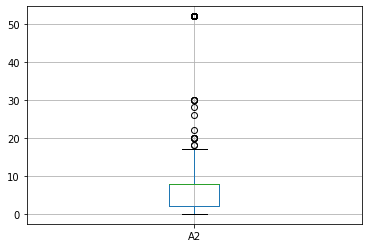

In [87]:
# outliers in A2 before median imputation 

X_train_copy[['A2']].boxplot()

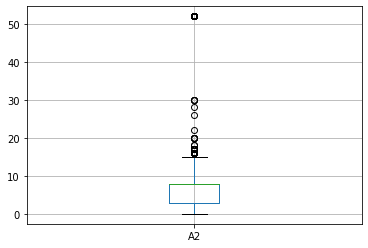

In [88]:
# outliers in A2 after median imputation 

X_train[['A2']].boxplot()

From the boxplot above, we can see that after the imputation we have few more outliers on the higher A2 values.

In [102]:
# function to create histogram, Q-Q plot and
# boxplot. 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30, color='red')
    plt.title('Histogram')

    # Q-Q plot
    qq = plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    qq.get_lines()[0].set_marker('y')
    qq.get_lines()[0].set_markerfacecolor('r')
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], color = 'yellow')
    plt.title('Boxplot')

    plt.show()

ValueError: Unrecognized marker style 'y'

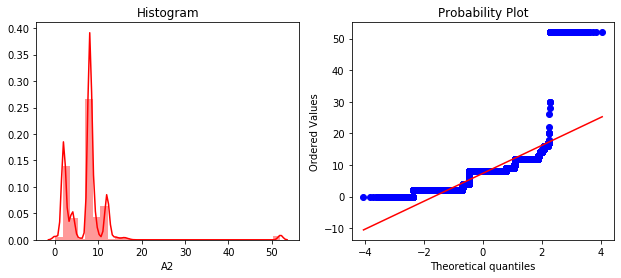

In [103]:
# let's find outliers 

for column in continuous:
    diagnostic_plots(X_train, 'A2')

In [ ]:
# create the capper

windsoriser = Winsorizer(distribution='skewed', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=continuous)

X_train = windsoriser.fit_transform(X_train)

In [ ]:
#for column in continuous:
diagnostic_plots(X_train, 'A2')

In [ ]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

In [ ]:
windsoriser.transform(X_test)

In [ ]:
X_train.describe()

In [ ]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
np.round(X_train_scaled.describe(), 1)

As expected, the mean of each variable, which were not centered at zero, is now around zero and the standard deviation is set to 1. 

In [ ]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['A1'], ax=ax1)
sns.kdeplot(X_train['A2'], ax=ax1)
sns.kdeplot(X_train['A5'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['A1'], ax=ax2)
sns.kdeplot(X_train_scaled['A2'], ax=ax2)
sns.kdeplot(X_train_scaled['A5'], ax=ax2)
plt.show()

In the above plots standardisation centered all the distributions at zero, but it preserved their original distribution. The value range is not identical, but it looks more homogeneous across the variables.

In [ ]:
data[(data['A15']<1) & (data['A15']>-1)].shape

In [ ]:
data[(data['A15'] == -99)].shape

In [ ]:
data.shape[0]

In [ ]:
data[(data['A15'] == 99)].shape